**this file is for any experimental data analysis you want to do**

   - have your name on and start coding code

In [2]:
#Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
#NY Population

# Load and clean New York population table
ny_pop_df = pd.read_excel("NY_Pop_data.xlsx", skiprows=2)

ny_pop_df.columns = [
    "Geographic_Area",
    "Base_2020",
    "Pop_2020",
    "Pop_2021",
    "Pop_2022",
    "Pop_2023",
    "Pop_2024",
]

# clean
ny_pop_df = ny_pop_df.iloc[1:]
ny_pop_df = ny_pop_df[ny_pop_df["Base_2020"].notna()].reset_index(drop=True)

# Add TOTAL pop
totals = ny_pop_df[["Base_2020", "Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024"]].sum()
total_row = {"Geographic_Area": "TOTAL_New_York"}
total_row.update(totals.to_dict())

ny_pop_df = pd.concat([ny_pop_df, pd.DataFrame([total_row])], ignore_index=True)

ny_pop_df.tail()

,Geographic_Area,Base_2020,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024
591,"Wyoming village, New York",384.0,383.0,383.0,380.0,378.0,376.0
592,"Yonkers city, New York",211575.0,210995.0,210104.0,208768.0,208922.0,211040.0
593,"Yorkville village, New York",2660.0,2655.0,2632.0,2608.0,2594.0,2592.0
594,"Youngstown village, New York",1863.0,1859.0,1853.0,1846.0,1836.0,1829.0
595,TOTAL_New_York,13021732.0,12945211.0,12668372.0,12552502.0,12591450.0,12694930.0


In [4]:
#NY Infow


# Load the "State Inflow" sheet
df = pd.read_excel("NY_County_data.xlsx", sheet_name="State Inflow", skiprows=5)

# Clean
df = df.iloc[:-3].reset_index(drop=True)

# Rename columns 
df.columns = [
    "Destination_State_Code",   # 36 = New York
    "Origin_State_Code",
    "Origin_State_Abbr",
    "Origin_State_Name",
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

# Make numeric columns numeric
for col in ["Destination_State_Code", "Origin_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

# Final dataframe
ny_state_inflow_df = df

ny_state_inflow_df.head()

,Destination_State_Code,Origin_State_Code,Origin_State_Abbr,Origin_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,36,96,NY,NY Total Migration-US and Foreign,178701,255377,22164959
1,36,97,NY,NY Total Migration-US,177619,253349,22094134
2,36,98,NY,NY Total Migration-Foreign,1082,2028,70825
3,36,97,NY,NY Total Migration-Same State,264415,425999,26739936
4,36,36,NY,NY Non-migrants,7869409,14681625,908659511


In [5]:
#NY Outflow


# Load the "State Outflow" sheet
df = pd.read_excel("NY_County_data.xlsx", sheet_name="State Outflow", skiprows=5)

# Clean
df = df.iloc[:-3].reset_index(drop=True)

# Rename 
df.columns = [
    "Origin_State_Code",        # 36 = New York
    "Destination_State_Code",
    "Origin_State_Abbr",        # NY
    "Destination_State_Name",   # e.g. Florida, New Jersey, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

# Make numeric columns numeric
for col in ["Origin_State_Code", "Destination_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

# Final dataframe
ny_state_outflow_df = df

ny_state_outflow_df.head()

,Origin_State_Code,Destination_State_Code,Origin_State_Abbr,Destination_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,36,96,NY,NY Total Migration-US and Foreign,289146,480158,36339557
1,36,97,NY,NY Total Migration-US,286205,476051,36252111
2,36,98,NY,NY Total Migration-Foreign,2941,4107,87447
3,36,97,NY,NY Total Migration-Same State,264415,425999,26739936
4,36,36,NY,NY Non-migrants,7869409,14681625,908659511


In [6]:
#CA Population


# Load the California population file
ca_pop_df = pd.read_excel("CA_Pop_data.xlsx", skiprows=2)

# columns  names
ca_pop_df.columns = [
    "Geographic_Area",
    "Base_2020",
    "Pop_2020",
    "Pop_2021",
    "Pop_2022",
    "Pop_2023",
    "Pop_2024",
]

#  Clean
ca_pop_df = ca_pop_df.iloc[1:, :]


ca_pop_df = ca_pop_df[ca_pop_df["Base_2020"].notna()].reset_index(drop=True)


for col in ["Base_2020", "Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024"]:
    ca_pop_df[col] = pd.to_numeric(ca_pop_df[col], errors="coerce")

# Add a TOTAL Population
totals = ca_pop_df[["Base_2020", "Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024"]].sum()
total_row = {"Geographic_Area": "TOTAL_California"}
total_row.update(totals.to_dict())

ca_pop_df = pd.concat([ca_pop_df, pd.DataFrame([total_row])], ignore_index=True)

#Final
ca_pop_df.tail()

,Geographic_Area,Base_2020,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024
478,"Yreka city, California",7818.0,7805.0,7877.0,7868.0,7769.0,7686.0
479,"Yuba City city, California",70213.0,70072.0,69691.0,69313.0,69116.0,69148.0
480,"Yucaipa city, California",54551.0,54607.0,54610.0,54313.0,54238.0,54465.0
481,"Yucca Valley town, California",21740.0,21766.0,21786.0,21746.0,21755.0,21858.0
482,TOTAL_California,33033738.0,33014575.0,32688791.0,32689054.0,32759256.0,32976857.0


In [7]:
# CA Inflow

# Loead
ca_in = pd.read_excel("CA_County_data.xlsx",
                      sheet_name="State Inflow",
                      skiprows=5)

# Clean
ca_in = ca_in.iloc[:-3].reset_index(drop=True)

# Rename columns
ca_in.columns = [
    "Destination_State_Code",   # 6 = California
    "Origin_State_Code",        # other state code
    "Destination_State_Abbr",   # CA
    "Origin_State_Name",        # e.g. Texas, New York, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Destination_State_Code", "Origin_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    ca_in[col] = pd.to_numeric(ca_in[col], errors="coerce")

ca_state_inflow_df = ca_in

#Final
ca_in.head()

,Destination_State_Code,Origin_State_Code,Destination_State_Abbr,Origin_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,6,96.0,CA,CA Total Migration-US and Foreign,259058.0,405166.0,2.873615e+07
1,6,97.0,CA,CA Total Migration-US,254935.0,396571.0,2.847351e+07
2,6,98.0,CA,CA Total Migration-Foreign,4123.0,8595.0,2.626390e+05
3,6,97.0,CA,CA Total Migration-Same State,523178.0,880978.0,6.077926e+07
4,6,6.0,CA,CA Non-migrants,15187730.0,30007256.0,1.874896e+09


In [8]:
#CA Outflow
# Load
ca_out = pd.read_excel("CA_County_data.xlsx",
                       sheet_name="State Outflow",
                       skiprows=5)

# Clean
ca_out = ca_out.iloc[:-3].reset_index(drop=True)

# Rename columns
ca_out.columns = [
    "Origin_State_Code",        # 6 = California
    "Destination_State_Code",   # other state code
    "Origin_State_Abbr",        # CA
    "Destination_State_Name",   # e.g. Texas, New York, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Origin_State_Code", "Destination_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    ca_out[col] = pd.to_numeric(ca_out[col], errors="coerce")

ca_state_outflow_df = ca_out

#Final
ca_out.head()

,Origin_State_Code,Destination_State_Code,Origin_State_Abbr,Destination_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,6,96.0,CA,CA Total Migration-US and Foreign,402652.0,711148.0,5.253745e+07
1,6,97.0,CA,CA Total Migration-US,399138.0,703688.0,5.226547e+07
2,6,98.0,CA,CA Total Migration-Foreign,3514.0,7460.0,2.719790e+05
3,6,97.0,CA,CA Total Migration-Same State,523178.0,880978.0,6.077926e+07
4,6,6.0,CA,CA Non-migrants,15187730.0,30007256.0,1.874896e+09


In [9]:
#IOWA Population

# Load 
ia_pop_df = pd.read_excel("IOWA_Pop_data.xlsx", skiprows=2)

ia_pop_df.columns = [
    "Geographic_Area",
    "Base_2020",
    "Pop_2020",
    "Pop_2021",
    "Pop_2022",
    "Pop_2023",
    "Pop_2024",
]

# Clean
ia_pop_df = ia_pop_df.iloc[1:]
ia_pop_df = ia_pop_df[ia_pop_df["Base_2020"].notna()].reset_index(drop=True)

totals = ia_pop_df[["Base_2020", "Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024"]].sum()
total_row = {"Geographic_Area": "TOTAL_Iowa"}
total_row.update(totals.to_dict())

ia_pop_df = pd.concat([ia_pop_df, pd.DataFrame([total_row])], ignore_index=True)

#Final
ia_pop_df.tail()

,Geographic_Area,Base_2020,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024
936,"Yetter city, Iowa",20.0,20.0,20.0,19.0,20.0,19.0
937,"Yorktown city, Iowa",61.0,61.0,61.0,61.0,60.0,60.0
938,"Zearing city, Iowa",535.0,534.0,535.0,529.0,506.0,508.0
939,"Zwingle city, Iowa",86.0,86.0,85.0,86.0,86.0,86.0
940,TOTAL_Iowa,2565299.0,2566294.0,2574207.0,2579726.0,2595026.0,2616653.0


In [10]:
#IOWA Inflow

# Load 
ia_in = pd.read_excel("IOWA_County_data.xlsx",
                      sheet_name="State Inflow",
                      skiprows=5)

# Clean
ia_in = ia_in.iloc[:-3].reset_index(drop=True)

# Rename columns
ia_in.columns = [
    "Destination_State_Code",   # 19 = Iowa
    "Origin_State_Code",
    "Destination_State_Abbr",   # IA
    "Origin_State_Name",        # e.g. Illinois, Nebraska, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Destination_State_Code", "Origin_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    ia_in[col] = pd.to_numeric(ia_in[col], errors="coerce")

# Final 
ia_state_inflow_df = ia_in

ia_state_inflow_df.head()

,Destination_State_Code,Origin_State_Code,Destination_State_Abbr,Origin_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,19,96.0,IA,IA Total Migration-US and Foreign,32991.0,57841.0,2098743.0
1,19,97.0,IA,IA Total Migration-US,32859.0,57552.0,2090078.0
2,19,98.0,IA,IA Total Migration-Foreign,132.0,289.0,8666.0
3,19,97.0,IA,IA Total Migration-Same State,46500.0,78242.0,2655397.0
4,19,19.0,IA,IA Non-migrants,1194821.0,2474030.0,104183757.0


In [11]:
# IOWA Outflow

#Load
ia_out = pd.read_excel("IOWA_County_data.xlsx",
                       sheet_name="State Outflow",
                       skiprows=5)

# Clean
ia_out = ia_out.iloc[:-3].reset_index(drop=True)

# Rename columns
ia_out.columns = [
    "Origin_State_Code",        # 19 = Iowa
    "Destination_State_Code",   # other state code
    "Origin_State_Abbr",        # IA
    "Destination_State_Name",   # e.g. Illinois, Nebraska, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Origin_State_Code", "Destination_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    ia_out[col] = pd.to_numeric(ia_out[col], errors="coerce")

# Final 
ia_state_outflow_df = ia_out

ia_state_outflow_df.head()


,Origin_State_Code,Destination_State_Code,Origin_State_Abbr,Destination_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,19,96.0,IA,IA Total Migration-US and Foreign,37932.0,63234.0,2613308.0
1,19,97.0,IA,IA Total Migration-US,37807.0,62996.0,2606936.0
2,19,98.0,IA,IA Total Migration-Foreign,125.0,238.0,6372.0
3,19,97.0,IA,IA Total Migration-Same State,46500.0,78242.0,2655397.0
4,19,19.0,IA,IA Non-migrants,1194821.0,2474030.0,104183757.0


In [12]:
#Michigan Population


# Load 
mi_pop_df = pd.read_excel("MI_Pop_data.xlsx", skiprows=2)

mi_pop_df.columns = [
    "Geographic_Area",
    "Base_2020",
    "Pop_2020",
    "Pop_2021",
    "Pop_2022",
    "Pop_2023",
    "Pop_2024",
]

# Clean
mi_pop_df = mi_pop_df.iloc[1:]
mi_pop_df = mi_pop_df[mi_pop_df["Base_2020"].notna()].reset_index(drop=True)

totals = mi_pop_df[["Base_2020", "Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024"]].sum()
total_row = {"Geographic_Area": "TOTAL_Michigan"}
total_row.update(totals.to_dict())

mi_pop_df = pd.concat([mi_pop_df, pd.DataFrame([total_row])], ignore_index=True)

#Final
mi_pop_df.tail()

,Geographic_Area,Base_2020,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024
529,"Yale city, Michigan",1900.0,1899.0,1893.0,1884.0,1879.0,1878.0
530,"Ypsilanti city, Michigan",20653.0,20605.0,19180.0,19780.0,19549.0,20150.0
531,"Zeeland city, Michigan",5720.0,5718.0,5699.0,5672.0,5650.0,5637.0
532,"Zilwaukee city, Michigan",1534.0,1531.0,1522.0,1508.0,1498.0,1493.0
533,TOTAL_Michigan,5109311.0,5102188.0,5061006.0,5060263.0,5072887.0,5098906.0


In [13]:
#Michigan in flow


# Load 
mi_in = pd.read_excel("MI_County_data.xlsx",
                      sheet_name="State Inflow",
                      skiprows=5)

# Clean
mi_in = mi_in.iloc[:-3].reset_index(drop=True)

# Rename columns
mi_in.columns = [
    "Destination_State_Code",   # 26 = Michigan
    "Origin_State_Code",
    "Destination_State_Abbr",   # MI
    "Origin_State_Name",        # e.g. Ohio, Indiana, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Destination_State_Code", "Origin_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    mi_in[col] = pd.to_numeric(mi_in[col], errors="coerce")

# Final 
mi_state_inflow_df = mi_in

mi_in.head()

,Destination_State_Code,Origin_State_Code,Destination_State_Abbr,Origin_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,26,96.0,MI,MI Total Migration-US and Foreign,70955.0,122955.0,6152855.0
1,26,97.0,MI,MI Total Migration-US,70638.0,122292.0,6132978.0
2,26,98.0,MI,MI Total Migration-Foreign,317.0,663.0,19877.0
3,26,97.0,MI,MI Total Migration-Same State,160321.0,266523.0,9867114.0
4,26,26.0,MI,MI Non-migrants,3870664.0,7609894.0,336253350.0


In [14]:
#Michigan outflow


# Load 
mi_out = pd.read_excel("MI_County_data.xlsx",
                       sheet_name="State Outflow",
                       skiprows=5)

# Clean
mi_out = mi_out.iloc[:-3].reset_index(drop=True)

# Rename columns
mi_out.columns = [
    "Origin_State_Code",        # 26 = Michigan
    "Destination_State_Code",   # other state code
    "Origin_State_Abbr",        # MI
    "Destination_State_Name",   # e.g. Ohio, Indiana, ...
    "Num_Returns",
    "Num_Individuals",
    "AGI_Thousands",
]

for col in ["Origin_State_Code", "Destination_State_Code",
            "Num_Returns", "Num_Individuals", "AGI_Thousands"]:
    mi_out[col] = pd.to_numeric(mi_out[col], errors="coerce")

# Final 
mi_state_outflow_df = mi_out

mi_state_outflow_df.head()

,Origin_State_Code,Destination_State_Code,Origin_State_Abbr,Destination_State_Name,Num_Returns,Num_Individuals,AGI_Thousands
0,26,96.0,MI,MI Total Migration-US and Foreign,82632.0,135970.0,7520946.0
1,26,97.0,MI,MI Total Migration-US,82272.0,135274.0,7499267.0
2,26,98.0,MI,MI Total Migration-Foreign,360.0,696.0,21679.0
3,26,97.0,MI,MI Total Migration-Same State,160321.0,266523.0,9867114.0
4,26,26.0,MI,MI Non-migrants,3870664.0,7609894.0,336253350.0


NYC population (2024): 8478


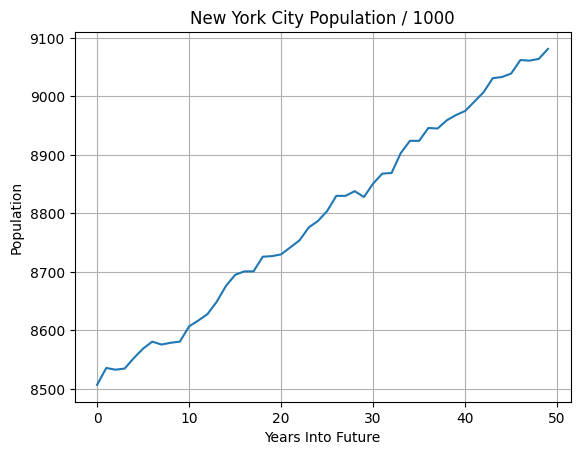

In [15]:
#Chase
import pandas as pd
import random
import matplotlib.pyplot as plt

# load file
df = pd.read_excel("SUB-IP-EST2024-POP-36.csv")

# rename first column to city
first_col = df.columns[0]
df = df.rename(columns={first_col: "city"})

# rename 7th column to 2024
df.columns.values[6] = "2024"
# select row for New York City
nyc_row = df[df["city"] == "New York city, New York"]

# use the 7th column (renamed to '2024') as initial population
initial_population = int(nyc_row["2024"].iloc[0]/1000)
print("NYC population (2024):", initial_population)

# model
class Person:
    def __init__(self, age=None):
        self.age = age if age is not None else random.randint(0, 90)
    def step(self):
        self.age += 1

class pop_growth:
    def __init__(self, population):
        self.people = [Person() for _ in range(population)]
        self.birth_rate = 0.01       # 1% per year
        self.death_rate = 0.008      # 0.8% per year
        self.migration = 0.002       # 0.2% net migration per year

        self.birth_mult = 1.0
        self.death_mult = 1.0
        self.migration_mult = 1.0

        self.year = 0

    # event every 10 years
    def apply_event(self):
        event_type = random.choice(["good", "bad"])

        if event_type == "good":
            # good event (tech boom, better healthcare, more jobs)
            self.birth_mult *= random.uniform(1.05, 1.15)
            self.death_mult *= random.uniform(0.85, 0.95)
            self.migration_mult *= random.uniform(1.10, 1.30)

        else:
            # bad event (high prices, recession, disease)
            self.birth_mult *= random.uniform(0.85, 0.95)
            self.death_mult *= random.uniform(1.10, 1.30)
            self.migration_mult *= random.uniform(0.70, 0.90)
            
    def step(self):
        # trigger event every 10 years
        if self.year % 10 == 0 and self.year != 0:
            self.apply_event()
        survivors = []
        births = 0
        for p in self.people:
            p.step()
            # death chance
            # age-dependent death probability
            age_factor = p.age / 100  # older people have higher death chance
            if random.random() > self.death_rate * (1 + age_factor):
                survivors.append(p)
                # birth chance
                if 18 <= p.age <= 40:
                    if random.random() < self.birth_rate:
                        births += 1
        self.people = survivors
        for _ in range(births):
            self.people.append(Person(age=0))

        # births
        births = int(self.birth_rate * len(self.people))
        for _ in range(births):
            self.people.append(Person(age=0))

        # migration
        migrants = int(len(self.people) * self.migration * random.uniform(0.5, 1.5))
        if migrants > 0:
            for _ in range(migrants):
                self.people.append(Person())
        else:
            self.people = self.people[:migrants]

    def population(self):
        return len(self.people)
        
years = 50
model = pop_growth(initial_population)
history = []

for _ in range(years):
    model.step()
    history.append(model.population())

# plot results
plt.plot(history)
plt.xlabel("Years Into Future")
plt.ylabel("Population")
plt.title("New York City Population / 1000")
plt.grid(True)